In [2]:
# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PyTorch
import torch


# Scikit-learn for data
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
iris_data =pd.read_csv('/content/IRIS.csv')


In [6]:
# Display first few rows
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Shape of dataset:", iris_data.shape)
print("\nData types:\n", iris_data.dtypes)

In [7]:
print("\nMissing values per column:\n",iris_data.isnull().sum())
print("\n Total missing value in dataset is: ", iris_data.isnull().sum().sum())
print("\n total percentage of missing value: ", (iris_data.isnull().sum().sum()/len(iris_data))*100, "%")


Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

 Total missing value in dataset is:  0

 total percentage of missing value:  0.0 %


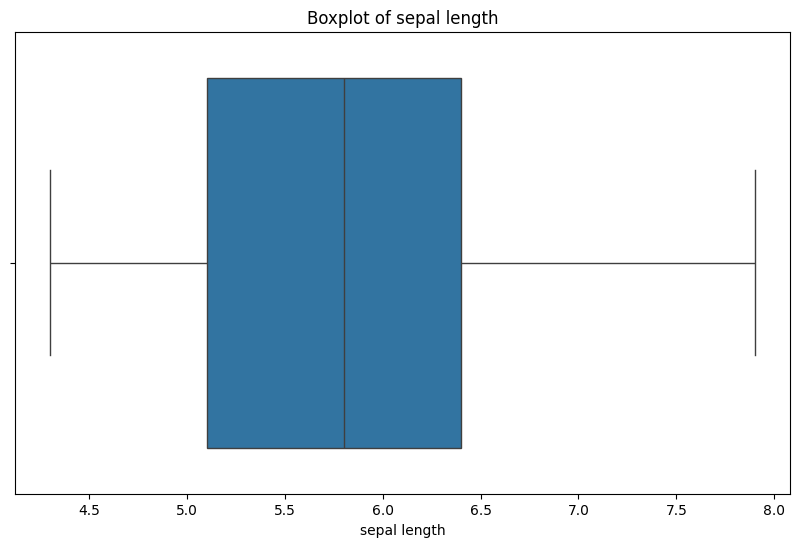


 No outlier for Speal length


In [8]:
# Show the boxplot of speal length
plt.figure(figsize=(10, 6))
sns.boxplot(x=iris_data['sepal_length'])
plt.title('Boxplot of sepal length')
plt.xlabel('sepal length')
plt.show()

print("\n No outlier for Speal length")

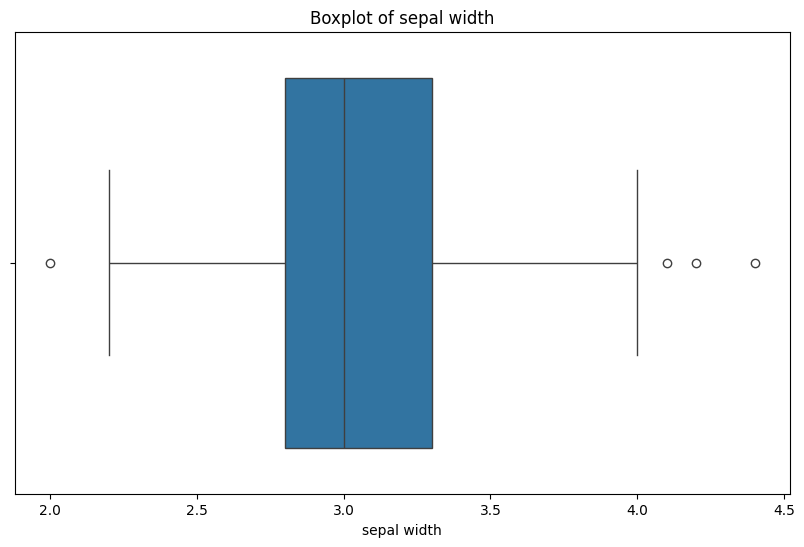

Number of outliers in 'sepal_width': 4
Outlier values:
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64


In [9]:
# Show the boxplot of speal width
plt.figure(figsize=(10, 6))
sns.boxplot(x=iris_data['sepal_width'])
plt.title('Boxplot of sepal width')
plt.xlabel('sepal width')
plt.show()


# Calculate Q1 (25th percentile)
Q1 = iris_data['sepal_width'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = iris_data['sepal_width'].quantile(0.75)
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
# Outliers are typically defined as points outside Q1 - 1.5*IQR and Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
# Outliers are values less than the lower_bound or greater than the upper_bound
outliers = iris_data[(iris_data['sepal_width'] < lower_bound) | (iris_data['sepal_width'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in 'sepal_width': {num_outliers}")

# Optionally, you can also print the outlier values
if num_outliers > 0:
    print("Outlier values:")
    print(outliers['sepal_width'])
else:
    print("No outliers found in 'sepal_width'.")



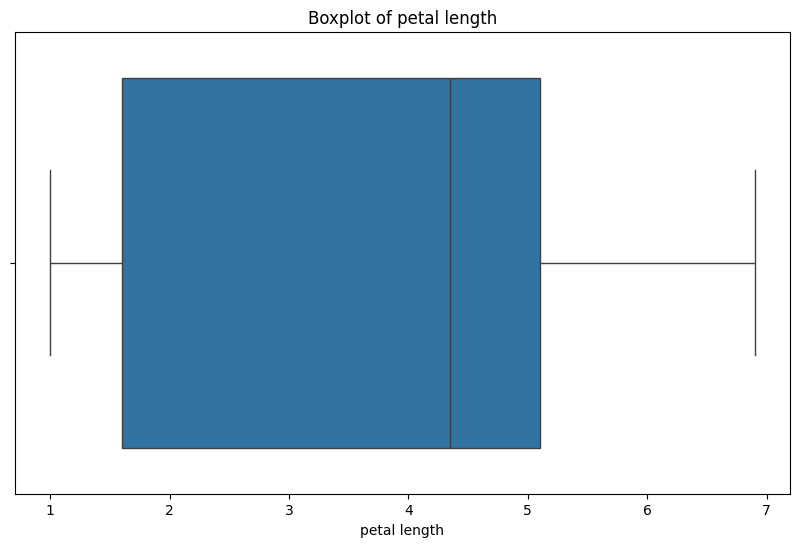


 No outlier for petal length


In [10]:
# Show the boxplot of petal length
plt.figure(figsize=(10, 6))
sns.boxplot(x=iris_data['petal_length'])
plt.title('Boxplot of petal length')
plt.xlabel('petal length')
plt.show()

print("\n No outlier for petal length")

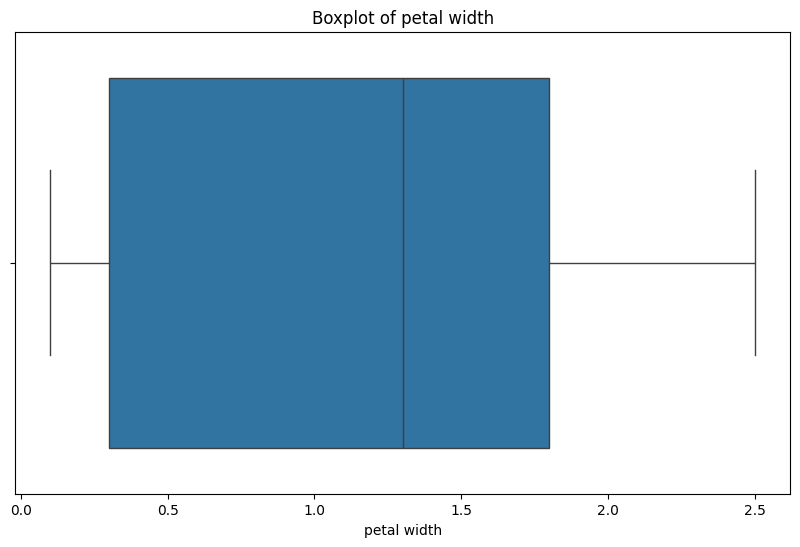


 No outlier for petal width


In [11]:
# Show the boxplot of petal width
plt.figure(figsize=(10, 6))
sns.boxplot(x=iris_data['petal_width'])
plt.title('Boxplot of petal width')
plt.xlabel('petal width')
plt.show()

print("\n No outlier for petal width")

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'species' column to numerical values
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Optional: see mapping
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_map)


Label mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [13]:
# Separate features and labels
X = iris_data.drop('species', axis=1).values
y = iris_data['species'].values


In [14]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [17]:
import torch
import torch.nn as nn

# Set sizes
input_size = 4       # 4 features in Iris
hidden_size = 10    # hidden layer size
output_size = 3      # 3 classes

# Random weight initialization (requires_grad=True to enable training)
W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

W2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

# ReLU activation
def relu(x):
    return torch.maximum(x, torch.tensor(0.0))

# Forward pass (manual)
def forward(X):
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    return z2  # logits, no softmax

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Training parameters
epochs = 50
learning_rate = 0.05
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(epochs):
    # --- Forward pass ---
    logits = forward(X_train)

    # --- Compute loss ---
    loss = loss_fn(logits, y_train)

    # --- Backward pass ---
    loss.backward()

    # --- Manual SGD update ---
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad

        # Zero gradients manually
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # --- Accuracy calculation ---
    with torch.no_grad():
        train_preds = torch.argmax(forward(X_train), dim=1)
        test_preds = torch.argmax(forward(X_test), dim=1)

        train_acc = (train_preds == y_train).float().mean().item()
        test_acc = (test_preds == y_test).float().mean().item()

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # --- Print progress ---
    print(f"Epoch {epoch+1:02d}/{epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")


Epoch 01/50 | Loss: 3.5231 | Train Acc: 0.3333 | Test Acc: 0.1667
Epoch 02/50 | Loss: 2.7044 | Train Acc: 0.3333 | Test Acc: 0.1667
Epoch 03/50 | Loss: 1.9532 | Train Acc: 0.4250 | Test Acc: 0.2667
Epoch 04/50 | Loss: 1.3487 | Train Acc: 0.5583 | Test Acc: 0.4667
Epoch 05/50 | Loss: 1.0006 | Train Acc: 0.6417 | Test Acc: 0.5667
Epoch 06/50 | Loss: 0.8483 | Train Acc: 0.6667 | Test Acc: 0.6000
Epoch 07/50 | Loss: 0.7791 | Train Acc: 0.6917 | Test Acc: 0.6000
Epoch 08/50 | Loss: 0.7399 | Train Acc: 0.7083 | Test Acc: 0.6000
Epoch 09/50 | Loss: 0.7131 | Train Acc: 0.7333 | Test Acc: 0.6000
Epoch 10/50 | Loss: 0.6923 | Train Acc: 0.7333 | Test Acc: 0.6333
Epoch 11/50 | Loss: 0.6750 | Train Acc: 0.7333 | Test Acc: 0.6333
Epoch 12/50 | Loss: 0.6599 | Train Acc: 0.7333 | Test Acc: 0.6333
Epoch 13/50 | Loss: 0.6464 | Train Acc: 0.7250 | Test Acc: 0.6333
Epoch 14/50 | Loss: 0.6339 | Train Acc: 0.7333 | Test Acc: 0.6333
Epoch 15/50 | Loss: 0.6224 | Train Acc: 0.7333 | Test Acc: 0.6667
Epoch 16/5

In [18]:
print(f"\n Final Train Accuracy: {train_accuracies[-1]*100:.2f}%")
print(f" Final Test Accuracy : {test_accuracies[-1]*100:.2f}%")



 Final Train Accuracy: 84.17%
 Final Test Accuracy : 80.00%


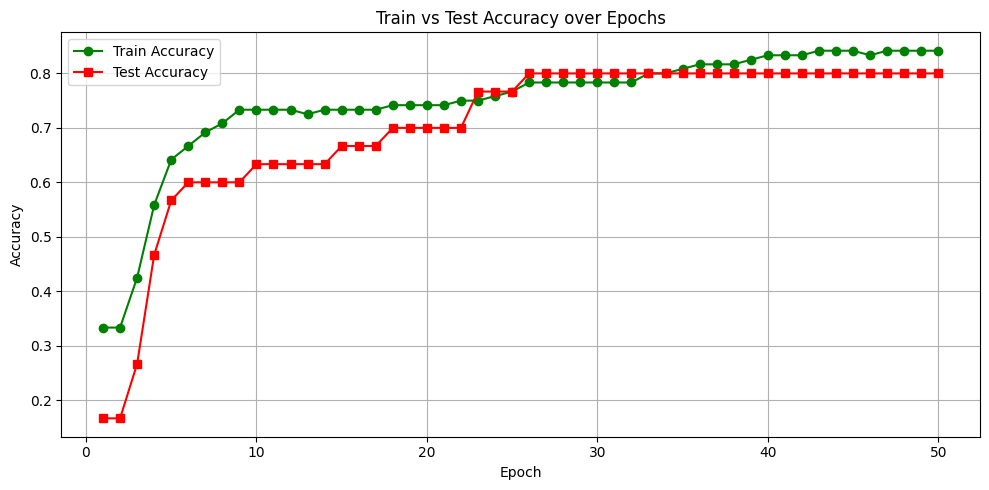

In [20]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_accuracies, label='Train Accuracy',color="green", marker='o')
plt.plot(epochs_range, test_accuracies, label='Test Accuracy',color="red", marker='s')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_epoc_plot.png", dpi=300, bbox_inches='tight')
plt.show()

